In [1]:
import pandas as pd

# Load Dataset

### train data

In [2]:
train = pd.read_csv('train.csv', index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### test data

In [3]:
test = pd.read_csv('test.csv', index_col="PassengerId")
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Preprocessing 

# sex encoding

In [4]:
# 성별을 구분, 남자는 = 0, 여자는 = 1
# 그리고 .loc 함수를 통해 새로운 컬럼 만들기

train.loc[train["Sex"] == 'male', "Sex_encode"] = 0
train.loc[train["Sex"] == 'female', "Sex_encode"] = 1

print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [5]:
test.loc[test["Sex"] == 'male', "Sex_encode"] = 0 
test.loc[test["Sex"] == 'female', "Sex_encode"] = 1

In [6]:
test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


### Fill in missing "Fare" from test

In [7]:
# test 데이터의 "Fare" 컬럼에 비어있는 컬럼이 있음!
# 이를 train 데이터에서 평균값을 도출해, 대입 할 예정

test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [8]:
# train 데이터에서 "Fare"컬럼의 데이터의 평균값 내기

mean_fare = train["Fare"].mean() # 운임료의 평균값을 mean_fare란 변수에 넣기
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


# Encode Embarked

In [9]:
# "Embarked" 컬럼을 하나씩 나눠서, 값을 대입
# 탑승은 1, 아니면 0
# .get dummies 함수를 이용해, 분류

train_embarked = pd.get_dummies(train["Embarked"], prefix = "Embarked")
print(train_embarked.shape)
train_embarked.head()

(891, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [34]:
# .concat 함수를 이용해, 컬럼 붙히기

train = pd.concat([train, train_embarked], axis = 1)
print(train.shape)
train.head()

(891, 18)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1,0,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1,0,0,1


In [11]:
# test 데이터 역시, .get_dummies() 함수를 이용해, "Embarked" 컬럼 분류

test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")
print(test_embarked.shape)
test_embarked.head()

(418, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


In [12]:
# .concat() 함수를 이용해, test 데이터에 붙이기

test = pd.concat([test, test_embarked], axis=1)
print(test.shape)
test.head()

(418, 14)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0,0,1


In [35]:
# 의사결정에 도움을 주는 컬럼 분류
# 이를 x축에 대입

feature_names = [
    "Pclass", "Sex_encode", "Fare", 
    "Embarked_C", "Embarked_Q", "Embarked_S"
]
X_train = train[feature_names]
print(X_train.shape)
X_train.tail()

(891, 9)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_C,Embarked_Q,Embarked_Q,Embarked_S,Embarked_S
PassengerId,,,,,,,,,
887,2,0.0,13.00,0,0,0,0,1,1
888,1,1.0,30.00,0,0,0,0,1,1
889,3,1.0,23.45,0,0,0,0,1,1
890,1,0.0,30.00,1,1,0,0,0,0
891,3,0.0,7.75,0,0,1,1,0,0


In [14]:
# 의사 결정을 통해, 내린 답을 대입 할 컬럼

lable_name = "Survived"

y_train = train[lable_name]
print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [15]:
# test 데이터에서 X_test와 lable 분류

In [16]:
# test에서 의사 결정에 도움을 줄 X축 분류
feature_names = ["Pclass", "Sex_encode", "Fare", 
    "Embarked_C", "Embarked_Q", "Embarked_S"]
X_test = test[feature_names]

In [17]:
print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,0.0,7.8292,0,1,0
893,3,1.0,7.0000,0,0,1
894,2,0.0,9.6875,0,1,0
895,3,0.0,8.6625,0,0,1
896,3,1.0,12.2875,0,0,1


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# 모델 변수 만들고, 의사 결정 단계를 5단계로 설정

model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [20]:
# model 학습 시키기

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


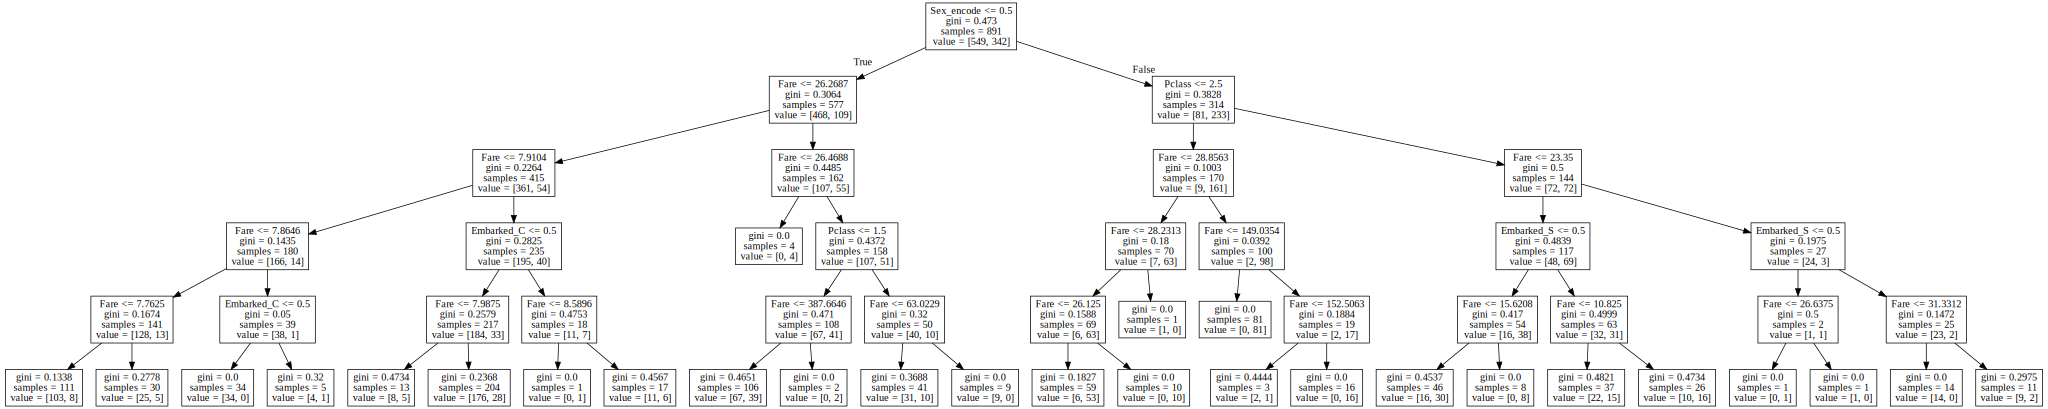

In [36]:
%load_ext gvmagic
from sklearn.tree import export_graphviz

dot_tree  = export_graphviz(model,
                            feature_names=feature_names,
                            out_file=None)


# print(dot_tree)
%dotstr dot_tree

In [37]:
# 학습한 모델을 X_test에 대입하여, 예측값 내기

predictions = model.predict(X_test)
print(predictions.shape)
predictions

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,